In [209]:
import numpy as np
from PIL import Image
import os
import sys
import cv2
from Otsu import Otsu
from CurveDetect import CurveDetect
from tools import delete_noise, show_prediction
import sys
sys.path.append("../main/")
from validation import validate
from Devide import Devide

In [210]:
i = 0 

33
3c4c675825f7509877bc10497f498c9a2e3433bf922bd870914a2eb21a54fd26


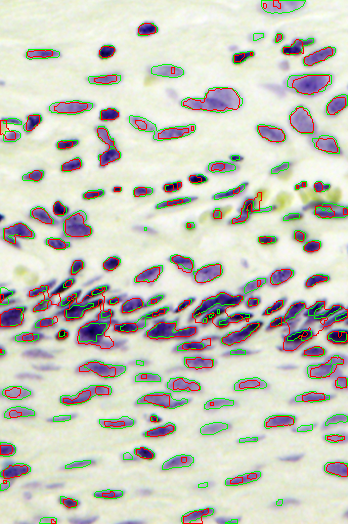

In [244]:
# test画像の分析
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/stage1_test/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/answer/"
COMPARE_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/answer_0352/"

print(i)
filenames = os.listdir(ANSWER_FILE_ROOT)
filename = filenames[i].split(".")[0]
print(filename)
i += 1

original_image =  Image.open(TEST_FILE_ROOT + filename + '/images/' + filename + ".png")
predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")
compare_image = Image.open(COMPARE_FILE_ROOT + filename + ".png") 

original_image_array = np.asarray(original_image)[:, :, :3].copy()
predicted_mask_array = np.asarray(predicted_mask) # green
compare_image_array = np.asarray(compare_image) # red
#devide = Devide(original_image_array, predicted_mask_array)
#predicted_mask_array = devide.make_mask()

dst = show_prediction(original_image_array, predicted_mask_array, compare_image_array)
dst

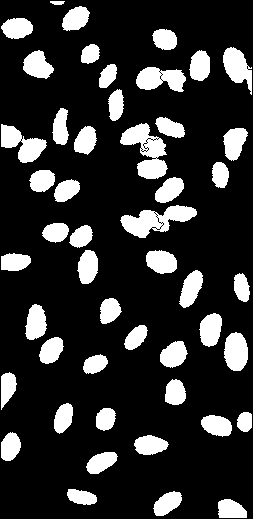

In [26]:
Image.fromarray(predicted_mask_array)

In [7]:
i = 0

17
53ad09e4348767bece0165884bf40c10b72ae18444e3f414a850442f02385efc.png
score:  0.648610485073185
0.5 : 0.84375
0.55 : 0.8015267175572519
0.6 : 0.7744360902255639
0.65 : 0.7611940298507462
0.7 : 0.7352941176470589
0.75 : 0.7101449275362319
0.8 : 0.6737588652482269
0.85 : 0.5945945945945946
0.9 : 0.4567901234567901
0.95 : 0.1346153846153846


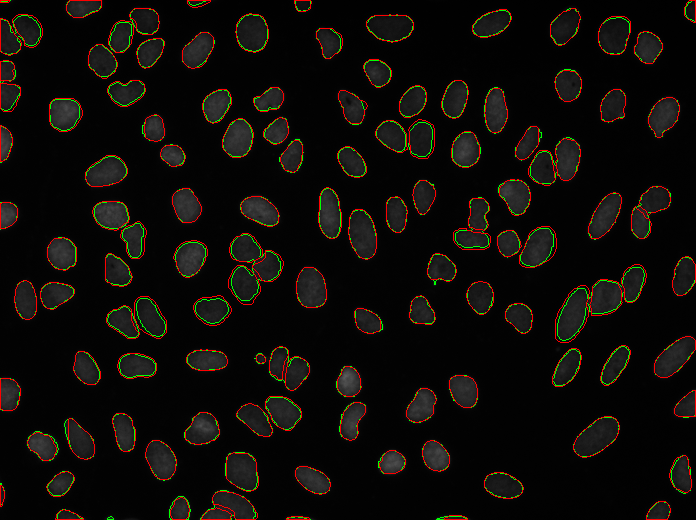

In [208]:
# validation画像の分析
TRAIN_FILE_ROOT_COLOR = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default_color/"
TRAIN_FILE_ROOT_GRAY  = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default_gray/"
VALIDATION_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/answer_val/"
TRAIN_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default/"

print(i)
filenames = os.listdir(VALIDATION_FILE_ROOT)
filename = filenames[i]
print(filename)
i += 1

original_image =  Image.open(TRAIN_FILE_ROOT + '/images/' + filename)
predicted_mask = Image.open(VALIDATION_FILE_ROOT + filename )
gt_mask = Image.open(TRAIN_FILE_ROOT + 'masks/' + filename)
original_image_array = np.asarray(original_image)[:, :, :3].copy()  # なぜかcopyを入れないと動かない・・・
predicted_mask_array = np.asarray(predicted_mask)
gt_mask_array = np.asarray(gt_mask)

val, vs, _ = validate(predicted_mask_array, gt_mask_array)
threshold = np.linspace(0.5, 0.95, 10)
threshold = np.around(threshold, decimals=2)
print("score: ", val)
for v, thresh in zip(vs, threshold):
    print(thresh, ":", v)
    
dst = show_prediction(original_image_array, predicted_mask_array, gt_mask_array)
dst

In [19]:
tmp = Devide(original_image_array, predicted_mask_array)

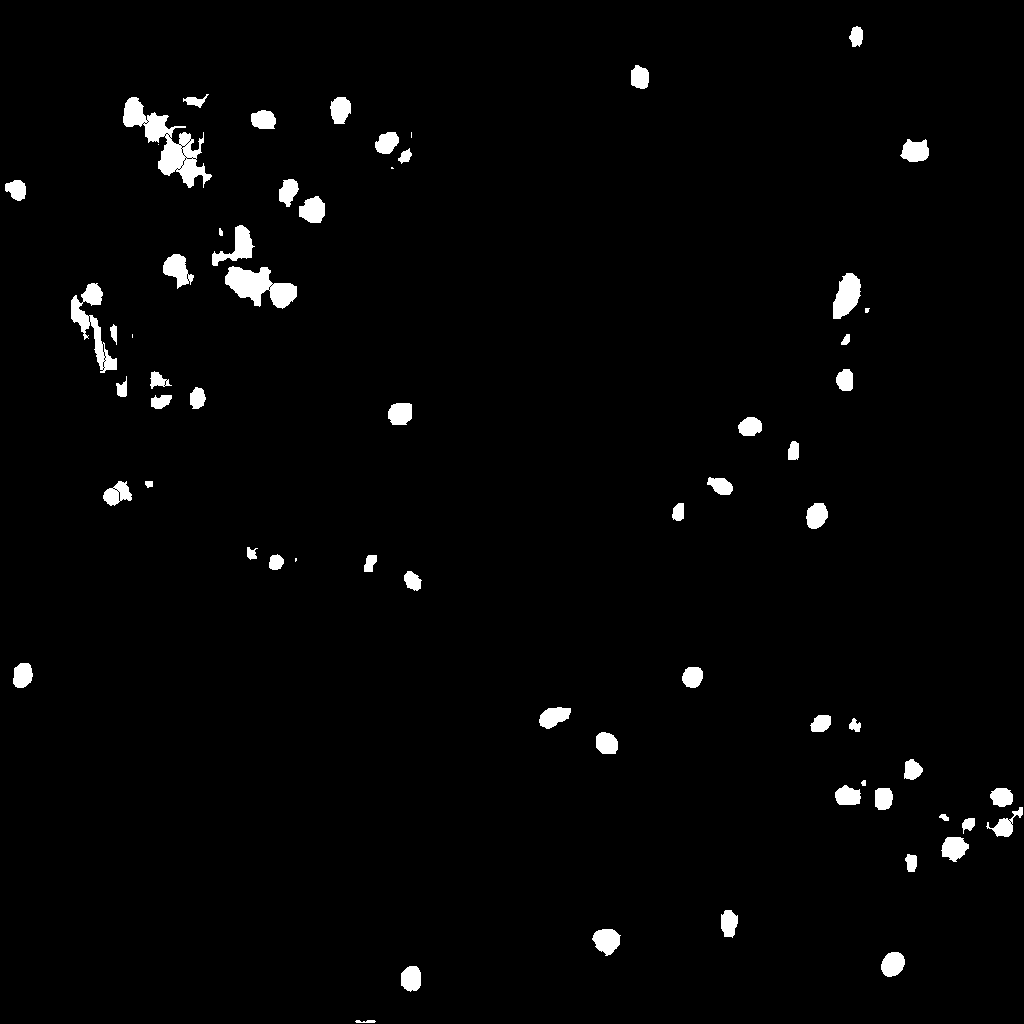

In [20]:
Image.fromarray(((tmp.data() != 1) * (tmp.data() != -1) * 255).astype(np.uint8))

In [71]:
i = 0

In [103]:
# test画像の分析
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/Tissue_images/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/tmp/"

print(i)
filenames = os.listdir(ANSWER_FILE_ROOT)
filename = filenames[i].split(".png")[0]
print(filename)
i += 1
#filename = "TCGA-18-5592-01Z-00-DX1"

original_image =  Image.open(TEST_FILE_ROOT + filename + ".tif-0.png")
predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")

original_image_array = np.asarray(original_image)[:, :, :3].copy()
predicted_mask_array = np.asarray(predicted_mask) # green
#devide = Devide(original_image_array, predicted_mask_array)
#predicted_mask_array = devide.make_mask()

dst = show_prediction(original_image_array, predicted_mask_array)
dst

30


IndexError: list index out of range

In [250]:
filename = "/data/unagi0/kanayama/dataset/nuclei_images/answer_val_probs/0/probs.npy"

In [251]:
x = np.load(filename)

In [252]:
x.shape

(147, 640, 640)

In [253]:
x.dtype

dtype('float64')